In [76]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [25]:
dataset = load_diabetes()
data = dataset['data']
target = dataset['target']
desc = dataset['DESCR']
feat_names = dataset['feature_names']

In [26]:
print(desc)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [29]:
data_df = pd.DataFrame(data, columns=feat_names)
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [31]:
data_df.shape

(442, 10)

In [36]:
class LinearRegressor():
    
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        return X.dot(self.w)

In [61]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [73]:
# Без этого работать не будет, я проверил :)
data_wide = np.hstack((np.ones(len(data)).reshape(-1,1), data))

regressor = LinearRegressor()
X_train, X_test, y_train, y_test = train_test_split(data_wide, target)
regressor.fit(X_train, y_train)
regressor.w

array([ 153.6209408 ,   -3.453043  , -219.50286755,  508.37357497,
        344.55032814, -794.90367267,  488.99229429,  143.85358308,
        256.67110093,  681.11621568,   35.71828869])

In [67]:
predictions = regressor.predict(X_train)
e_train = predictions - y_train
print('Метрики на трейне:')
print('MSE:', mean_squared_error(y_train, predictions))
print('MAE:', mean_absolute_error(y_train, predictions))

Метрики на трейне:
MSE: 2902.1613827634446
MAE: 43.85321695297465


In [68]:
predictions = regressor.predict(X_test)
e_test = predictions - y_test
print('Метрики на тесте:')
print('MSE:', mean_squared_error(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))

Метрики на тесте:
MSE: 2756.217741970658
MAE: 41.892794201237585


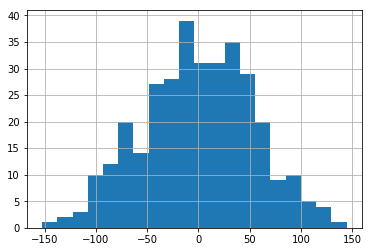

In [74]:
# Ошибки на трейне:
plt.hist(e_train, bins=20)
plt.grid()
plt.show()


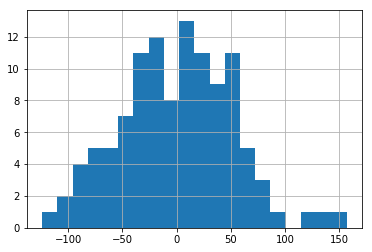

In [75]:
# Ошибки на тесте:
plt.hist(e_test, bins=20)
plt.grid()
plt.show()

In [80]:
# Проверка:
res = stats.normaltest(e_test)
alpha = 0.05
if res[1] < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


The null hypothesis cannot be rejected
